In [1]:
import os
import regex as re,string
from urllib import request 
from collections import defaultdict
import numpy as np
from joblib import dump, load
import pandas as pd
import pickle
import IPython
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [3]:
plotly.__version__

'3.6.1'

In [1]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)
  

In [4]:
# enable_plotly_in_cell()
# import plotly.graph_objs as go
# data = [
#     go.Contour(
#         z=[[10, 10.625, 12.5, 15.625, 20],
#            [5.625, 6.25, 8.125, 11.25, 15.625],
#            [2.5, 3.125, 5., 8.125, 12.5],
#            [0.625, 1.25, 3.125, 6.25, 10.625],
#            [0, 0.625, 2.5, 5.625, 10]]
#     )
# ]
# iplot(data)

In [9]:
def download_data(name_dir="data", filename="data.csv",
                  data_url = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/cities/totals/sub-est2017_42.csv'):
    """ 
    Download both train and test dataset to a directory named "data". 

    If the directory doesn't exist, this function will create one. 

    Parameters
    ----------
    data_url : str, default 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/cities/totals/sub-est2017_42.csv'
        The URL of the location of the file.
    filename : str, default 'data.csv'
    name_dir : str, default 'data'
        Name of the directory.
    
    Returns
    -------
    No return. Create a directory if needed and 
    download the file to that directory.
    """
    
    if not os.path.isdir(name_dir):
        os.makedirs(name_dir)

    data_path = os.path.join(name_dir, filename)

    request.urlretrieve(data_url,data_path)
    
def GEOID_ten(x):
    """
    Convert 12-digit geoid to 10-digit.
    
    More details can be found at https://www.census.gov/geo/reference/geoidentifiers.html.
    Parameters
    ----------
    x : int
    
    Returns
    -------
    int
    
    """
    
    astr = str(x)[:10]
    return int(astr)

def save_obj(obj, name, name_dir='data' ):
    """
    Save to pickle.
    
    Parameters
    ----------
    obj : any object 
        This can be a dictionary or ndarray.
    name : str
        The name for the object to be saved.
    name_dir : str, default 'data'
        Name of the directory.
    
    Returns
    -------
    No return.
        Save the pickle object to the local file system.
    """
    
    if not os.path.isdir(name_dir):
        os.makedirs(name_dir)

    data_path = os.path.join(name_dir, name+'.pkl')
    
    with open(data_path, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name, name_dir='data' ):
    """
    Load the pickle object from the local file system.
    
    Parameters
    ----------
    obj : any object 
        This can be a dictionary or ndarray.
    name : str
        The name for the object to be saved.
    name_dir : str, default 'data'
        Name of the directory.
    
    Returns
    -------
    object
        Return an object such as a dictionary.
    """
    data_path = os.path.join(name_dir, name+'.pkl')
    
    with open(data_path, 'rb') as f:
        return pickle.load(f)

def getCodeName(geoid,df):
    """
    Return city name and city code for a given geioid.
    
    Parameters
    ----------
    geoid : int
    df : DataFrame
    
    Returns
    -------
    tuple
    """
    temp = df[(df_ems.GEOID == geoid) & (df.CITY_NAME.notnull()) ][['CITY_CODE','CITY_NAME']]
    city_name = temp['CITY_NAME'].value_counts().index[0]
    city_code = temp[ temp['CITY_NAME'] == city_name]['CITY_CODE'].value_counts().index[0]
#     print(city_name,city_code)
    return city_name,city_code

def nested_dict():
  """
  This returns a empty nestable dictionary.
  """
  return defaultdict(nested_dict)




## Download Sub-county population dataset for PA

In [3]:
# https://www.census.gov/data/datasets/2017/demo/popest/total-cities-and-towns.html
url_pop = 'https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/cities/totals/sub-est2017_42.csv'

In [5]:
download_data(name_dir="data", 
              filename="population.csv",
              data_url=url_pop)

## Download EMS data 

In [7]:
url_ems = 'https://data.wprdc.org/dataset/abba9671-a026-4270-9c83-003a1414d628/resource/ff33ca18-2e0c-4cb5-bdcd-60a5dc3c0418/download/911-ems-dispatches.csv'

In [8]:
download_data(name_dir="data", 
              filename="EMS.csv",
              data_url=url_ems)

In [14]:
df_ems = pd.read_csv('data/EMS.csv')
df_ems.head()


Call_ID_Hash SERVICE PRIORITY                                PRIORITY_DESC  \
0  336ba345f5a0     EMS       E0  EMS ALS life threatening response w/ backup   
1  f59d50d394fa     EMS       E0  EMS ALS life threatening response w/ backup   
2  8d56b4f6f9fe     EMS       E0  EMS ALS life threatening response w/ backup   
3  e20045d2f6b4     EMS       E0  EMS ALS life threatening response w/ backup   
4  dbe1c9db46f6     EMS       E0  EMS ALS life threatening response w/ backup   

  AGENCY CALL_QUARTER  CALL_YEAR                  DESCRIPTION_SHORT CITY_CODE  \
0   E620           Q1       2015                         HEMORRHAGE       PVU   
1   E380           Q1       2015                        UNCONSCIOUS       PEN   
2   E620           Q1       2015                        UNCONSCIOUS       MCK   
3   E050           Q1       2015  GUNSHOT, STABBING, OR OTHER WOUND       PGH   
4   E050           Q1       2015                            ASSAULT       PGH   

    CITY_NAME         GEOID  
0    PORT VUE  420035003002  
1  PENN HILLS  420035235011  
2  MCKEESPORT  420035523003  
3  PITTSBURGH  420031306003  
4  PITTSBURGH  420031609002

In [15]:
df_pop = pd.read_csv('data/population.csv')
df_pop.head()

SUMLEV  STATE  COUNTY  PLACE  COUSUB  CONCIT  PRIMGEO_FLAG FUNCSTAT  \
0      40     42       0      0       0       0             0        A   
1     162     42       0    116       0       0             0        A   
2     162     42       0    332       0       0             0        A   
3     162     42       0    364       0       0             0        A   
4     162     42       0    396       0       0             0        A   

                  NAME        STNAME CENSUS2010POP  ESTIMATESBASE2010  \
0         Pennsylvania  Pennsylvania      12702379           12702857   
1  Abbottstown borough  Pennsylvania          1011               1011   
2    Adamsburg borough  Pennsylvania           172                172   
3    Adamstown borough  Pennsylvania          1789               1789   
4      Addison borough  Pennsylvania           207                207   

   POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
0         12711063         12742811         12768034         12778450   
1             1010             1011             1008             1006   
2              172              171              170              169   
3             1801             1835             1837             1839   
4              207              205              204              202   

   POPESTIMATE2014  POPESTIMATE2015  POPESTIMATE2016  POPESTIMATE2017  
0         12790341         12791124         12787085         12805537  
1             1009             1012             1013             1020  
2              168              167              165              164  
3             1844             1845             1847             1850  
4              201              198              198              197

In [16]:
df_pop['NAME_UP'] = df_pop['NAME'].str.upper() #  .str.replace('[^\w\s]','')
df_pop.head()


SUMLEV  STATE  COUNTY  PLACE  COUSUB  CONCIT  PRIMGEO_FLAG FUNCSTAT  \
0      40     42       0      0       0       0             0        A   
1     162     42       0    116       0       0             0        A   
2     162     42       0    332       0       0             0        A   
3     162     42       0    364       0       0             0        A   
4     162     42       0    396       0       0             0        A   

                  NAME        STNAME         ...          ESTIMATESBASE2010  \
0         Pennsylvania  Pennsylvania         ...                   12702857   
1  Abbottstown borough  Pennsylvania         ...                       1011   
2    Adamsburg borough  Pennsylvania         ...                        172   
3    Adamstown borough  Pennsylvania         ...                       1789   
4      Addison borough  Pennsylvania         ...                        207   

   POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
0         12711063         12742811         12768034         12778450   
1             1010             1011             1008             1006   
2              172              171              170              169   
3             1801             1835             1837             1839   
4              207              205              204              202   

   POPESTIMATE2014  POPESTIMATE2015  POPESTIMATE2016  POPESTIMATE2017  \
0         12790341         12791124         12787085         12805537   
1             1009             1012             1013             1020   
2              168              167              165              164   
3             1844             1845             1847             1850   
4              201              198              198              197   

               NAME_UP  
0         PENNSYLVANIA  
1  ABBOTTSTOWN BOROUGH  
2    ADAMSBURG BOROUGH  
3    ADAMSTOWN BOROUGH  
4      ADDISON BOROUGH  

[5 rows x 21 columns]

In [9]:
df_ems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780698 entries, 0 to 780697
Data columns (total 11 columns):
Call_ID_Hash         780698 non-null object
SERVICE              780698 non-null object
PRIORITY             780698 non-null object
PRIORITY_DESC        780698 non-null object
AGENCY               780698 non-null object
CALL_QUARTER         780698 non-null object
CALL_YEAR            780698 non-null int64
DESCRIPTION_SHORT    778103 non-null object
CITY_CODE            780634 non-null object
CITY_NAME            780611 non-null object
GEOID                780698 non-null int64
dtypes: int64(2), object(9)
memory usage: 65.5+ MB


In [11]:
getCodeName(420035629002,df_ems)

('PITTSBURGH', 'PGH')

In [14]:
# Get index for missing values at CITY_CODE and CITY_NAME
index_for_missing_values = df_ems[(df_ems.CITY_NAME.isnull()) | (df_ems.CITY_CODE.isnull())].index.tolist()
index_for_missing_values[:10]

[7200, 7237, 29818, 45426, 51944, 69156, 104522, 104614, 107710, 114511]

In [15]:
# Fill the missing values
for index in index_for_missing_values:
    geoid = df_ems.loc[index,'GEOID']
    ct_name, ct_code = getCodeName(geoid,df_ems)
    
    df_ems.loc[index,'CITY_NAME'] = ct_name
    df_ems.loc[index,'CITY_CODE'] = ct_code

# Recheck missing at CITY_CODE and CITY_NAME
df_ems[(df_ems.CITY_NAME.isnull()) | (df_ems.CITY_CODE.isnull())].index.tolist()


[]

In [16]:
df_ems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780698 entries, 0 to 780697
Data columns (total 11 columns):
Call_ID_Hash         780698 non-null object
SERVICE              780698 non-null object
PRIORITY             780698 non-null object
PRIORITY_DESC        780698 non-null object
AGENCY               780698 non-null object
CALL_QUARTER         780698 non-null object
CALL_YEAR            780698 non-null int64
DESCRIPTION_SHORT    778103 non-null object
CITY_CODE            780698 non-null object
CITY_NAME            780698 non-null object
GEOID                780698 non-null int64
dtypes: int64(2), object(9)
memory usage: 65.5+ MB


In [17]:
df_ems[df_ems.DESCRIPTION_SHORT.isnull()]['PRIORITY_DESC'].value_counts()

EMS Admin Mark out                             2491
EMS ALS life threatening response                31
EMS Standard BLS response                        31
EMS Standard ALS response                        21
EMS ALS life threatening response w/ backup      12
EMS BLS Assistance response                       8
Fire Notifications                                1
Name: PRIORITY_DESC, dtype: int64

In [18]:
df_ems['DESCRIPTION_SHORT'].fillna('MISSING',inplace=True)

In [19]:
df_ems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780698 entries, 0 to 780697
Data columns (total 11 columns):
Call_ID_Hash         780698 non-null object
SERVICE              780698 non-null object
PRIORITY             780698 non-null object
PRIORITY_DESC        780698 non-null object
AGENCY               780698 non-null object
CALL_QUARTER         780698 non-null object
CALL_YEAR            780698 non-null int64
DESCRIPTION_SHORT    780698 non-null object
CITY_CODE            780698 non-null object
CITY_NAME            780698 non-null object
GEOID                780698 non-null int64
dtypes: int64(2), object(9)
memory usage: 65.5+ MB


In [22]:
ct_names = df_ems.CITY_NAME.unique().tolist()
ct_names[:10]

['PORT VUE',
 'PENN HILLS',
 'MCKEESPORT',
 'PITTSBURGH',
 'ROSS',
 'SOUTH FAYETTE',
 'FRANKLIN PARK',
 'DUQUESNE',
 'PITCAIRN',
 'WEST MIFFLIN']

In [23]:
# Check Westmoreland county in city names
df_ems[df_ems.CITY_NAME.isin(['WESTMORELAND COUNTY'])]

Call_ID_Hash SERVICE PRIORITY                      PRIORITY_DESC  \
211893  eb764b289f44     EMS       E1  EMS ALS life threatening response   

       AGENCY CALL_QUARTER  CALL_YEAR                  DESCRIPTION_SHORT  \
211893   E590           Q4       2015  COMMERCIAL OR APARTMENT BLDG FIRE   

       CITY_CODE            CITY_NAME         GEOID  
211893       WST  WESTMORELAND COUNTY  420034961023

In [24]:
# Drop westmoreland county
print("No. of rows before dropping = ", len(df_ems))
df_ems.drop(df_ems[df_ems.CITY_NAME.isin(['WESTMORELAND COUNTY'])].index, inplace=True)
print("No. of rows after dropping = ", len(df_ems))

No. of rows before dropping =  780698
No. of rows after dropping =  780697


## Import preprocessed dataset

In [7]:
# Save data after filling missing values.
# save_obj(df_ems,'df_ems')
df_ems = load_obj('df_ems')

In [18]:
# Rebuild the city name list
ct_names = df_ems.CITY_NAME.unique().tolist()

In [19]:
df_pop.head()

SUMLEV  STATE  COUNTY  PLACE  COUSUB  CONCIT  PRIMGEO_FLAG FUNCSTAT  \
0      40     42       0      0       0       0             0        A   
1     162     42       0    116       0       0             0        A   
2     162     42       0    332       0       0             0        A   
3     162     42       0    364       0       0             0        A   
4     162     42       0    396       0       0             0        A   

                  NAME        STNAME         ...          ESTIMATESBASE2010  \
0         Pennsylvania  Pennsylvania         ...                   12702857   
1  Abbottstown borough  Pennsylvania         ...                       1011   
2    Adamsburg borough  Pennsylvania         ...                        172   
3    Adamstown borough  Pennsylvania         ...                       1789   
4      Addison borough  Pennsylvania         ...                        207   

   POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  POPESTIMATE2013  \
0         12711063         12742811         12768034         12778450   
1             1010             1011             1008             1006   
2              172              171              170              169   
3             1801             1835             1837             1839   
4              207              205              204              202   

   POPESTIMATE2014  POPESTIMATE2015  POPESTIMATE2016  POPESTIMATE2017  \
0         12790341         12791124         12787085         12805537   
1             1009             1012             1013             1020   
2              168              167              165              164   
3             1844             1845             1847             1850   
4              201              198              198              197   

               NAME_UP  
0         PENNSYLVANIA  
1  ABBOTTSTOWN BOROUGH  
2    ADAMSBURG BOROUGH  
3    ADAMSTOWN BOROUGH  
4      ADDISON BOROUGH  

[5 rows x 21 columns]

In [10]:
def get_pop(ct_name, df, name_col, yr_st, yr_end):
    columns=['POPESTIMATE{yr}'.format(yr=str(yr)) 
             for yr in range(yr_st, yr_end+1)]
    ct_ext = ['BOROUGH', 'CITY', 'TOWNSHIP', 'MUNICIPALITY']
    if ct_name.endswith(('BOROUGH', 'CITY', 'TOWNSHIP', 'BORO')):
        alist = ct_name.split()
        ct_name = ' '.join(alist[:-1])
    if 'CLAIR' in ct_name:
        ct_name = ct_name.replace('ST ', 'ST. ')
    ct_names = ['{name} {ext}'.format(name=ct_name, ext=ext) 
                for ext in ct_ext]
    return (df[(df[name_col]
                .isin(ct_names))][columns]
            .median().astype('int').tolist())
    

In [30]:
get_pop('SOUTH FAYETTE',df_pop,'NAME_UP',2015,2017)

[15423, 15511, 15614]

In [9]:
def get_pop_dict(ct_names, df, name_col, yr_st, yr_end):
    pop_dict = nested_dict()
    for ct_name in ct_names:
        try:
            pops = get_pop(ct_name, df, name_col, yr_st, yr_end)
            for yr,pop in zip(range(yr_st,yr_end+1), pops):
                pop_dict[ct_name][yr]=pop
        except ValueError:
            print(ct_name)
            return ct_name
    return pop_dict

## Import preprocessed population dictionary

In [10]:
#pop_dict = get_pop_dict(ct_names,df_pop,'NAME_UP',2015,2017)
# load pop_dict from the local system.
pop_dict = load_obj('pop_dict')

In [28]:
# Save pop_dict to a local file system.
# save_obj(pop_dict, 'pop_dict')

In [11]:
def get_pop(x, **kwargs):
    pop_dict = kwargs['pop_dict']
    yr = kwargs['yr']
    if yr == 2018:
        yr = 2017
    return pop_dict[x][yr]

def get_call_per_city(df, pop_dict, yr):
    df_city_count =df[df['CALL_YEAR'] == yr]['CITY_NAME'].value_counts().reset_index()
    df_city_count.columns = ['CITY_NAME', 'NO. OF CALLS']
    df_city_count['PERCENTAGE OVER TOTAL CALLS'] = round(df_city_count['NO. OF CALLS']/
                                                         df_city_count['NO. OF CALLS'].sum()*
                                                         100,2)
    col_name = 'POPULATION'.format(yr=yr)
    df_city_count[col_name] = (df_city_count['CITY_NAME']
                               .apply(get_pop, pop_dict=pop_dict, yr = yr))
    
    df_city_count['CALL_PER_POP'] = (df_city_count['NO. OF CALLS']/
                                     df_city_count[col_name])
    # Sort the column
    df_city_count.sort_values(by=['CALL_PER_POP',col_name],
                              ascending=False,
                              inplace=True)
    
    return df_city_count
    
    

In [12]:
call_per_city_2015 = get_call_per_city(df_ems, pop_dict, 2015)
call_per_city_2015.head()

CITY_NAME  NO. OF CALLS  PERCENTAGE OVER TOTAL CALLS  POPULATION  \
19            HARRISON          1823                         0.97        1011   
43                PINE          1039                         0.55         744   
24  ELIZABETH TOWNSHIP          1645                         0.87        1504   
32            RICHLAND          1397                         0.74        1567   
4                 ROSS          4700                         2.49        5774   

    CALL_PER_POP  
19      1.803165  
43      1.396505  
24      1.093750  
32      0.891512  
4       0.813994

In [13]:
call_per_city_2016 = get_call_per_city(df_ems, pop_dict, 2016)
call_per_city_2016.head()

CITY_NAME  NO. OF CALLS  PERCENTAGE OVER TOTAL CALLS  POPULATION  \
18            HARRISON          1995                         1.02        1002   
50                PINE           991                         0.51         743   
32  ELIZABETH TOWNSHIP          1490                         0.76        1492   
4                 ROSS          4755                         2.44        5763   
37            RICHLAND          1251                         0.64        1579   

    CALL_PER_POP  
18      1.991018  
50      1.333782  
32      0.998660  
4       0.825091  
37      0.792274

In [14]:
call_per_city_2017 = get_call_per_city(df_ems, pop_dict, 2017)
call_per_city_2017.head()

CITY_NAME  NO. OF CALLS  PERCENTAGE OVER TOTAL CALLS  POPULATION  \
19            HARRISON          1979                         1.01         994   
44                PINE          1088                         0.55         738   
30  ELIZABETH TOWNSHIP          1588                         0.81        1482   
4                 ROSS          4686                         2.38        5805   
38            RICHLAND          1261                         0.64        1594   

    CALL_PER_POP  
19      1.990946  
44      1.474255  
30      1.071525  
4       0.807235  
38      0.791092

In [15]:
call_per_city_2018 = get_call_per_city(df_ems, pop_dict, 2018)
call_per_city_2018.head()

CITY_NAME  NO. OF CALLS  PERCENTAGE OVER TOTAL CALLS  POPULATION  \
19            HARRISON          1924                         0.96         994   
45                PINE          1065                         0.53         738   
27  ELIZABETH TOWNSHIP          1666                         0.83        1482   
35            RICHLAND          1417                         0.71        1594   
4                 ROSS          4878                         2.44        5805   

    CALL_PER_POP  
19      1.935614  
45      1.443089  
27      1.124157  
35      0.888959  
4       0.840310

In [16]:
def top_plot(df1, df2, df3, df4, pop_cutoff=0, top=10):
    city_names = []
    for df in [df1,df2,df3,df4]:
        city_names.extend(df1.iloc[:top,0].tolist())
    city_names = list(set(city_names))
    col_names = ['CITY_NAME', 'NO. OF CALLS', 
                 'POPULATION', 'CALL_PER_POP', 'YEAR']
    df_temp = pd.DataFrame(columns=col_names)
    for df, yr in zip([df1, df2, df3, df4],[2015, 2016, 2017, 2018]):
        df['YEAR'] = yr
        df_temp = df_temp.append(df[(df['CITY_NAME'].isin(city_names))
                                    & (df.iloc[:,3] > pop_cutoff)][col_names]
                                 .sort_values(by=['CALL_PER_POP','NO. OF CALLS'],
                                 ascending=False))
         
    return df_temp
    

In [17]:
Top_20_df = top_plot(call_per_city_2015, 
                     call_per_city_2016, 
                     call_per_city_2017,
                     call_per_city_2018,top=20)

In [17]:
Top_20_df.head()

CITY_NAME NO. OF CALLS POPULATION  CALL_PER_POP  YEAR
19            HARRISON         1823       1011      1.803165  2015
43                PINE         1039        744      1.396505  2015
24  ELIZABETH TOWNSHIP         1645       1504      1.093750  2015
32            RICHLAND         1397       1567      0.891512  2015
4                 ROSS         4700       5774      0.813994  2015

In [18]:
def bar_plot(df,y='CALL_PER_POP', x='CITY_NAME', 
             hue='YEAR',get_traces=False):
    
    traces=[]

    for ahue, df_gp in df.groupby(hue):
        traces.append(go.Bar(x=df_gp[x], y=df_gp[y], name=ahue))
    if get_traces:
        return traces
    fig = go.Figure(data=traces)
#     fig.layout.template='seaborn'
#     iplot(fig)
    return fig

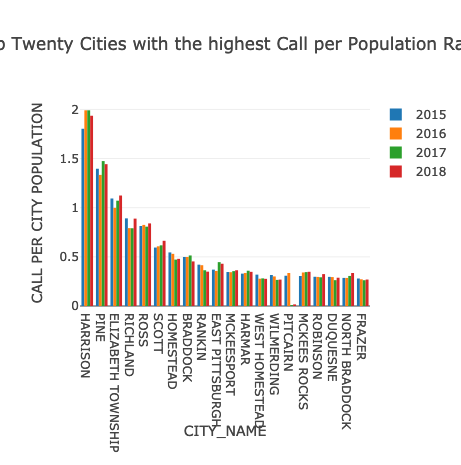

In [25]:
enable_plotly_in_cell()
def generate_labels(title,xlabel,ylabel):    
    layout = go.Layout(title= title,
                       xaxis=dict(title=xlabel, automargin=True),
                       yaxis=dict(title=ylabel))
    return {'layout':layout}

title = ('Top Twenty Cities with the highest Call per '
         'Population Ratio')
xlabel = 'CITY_NAME'
ylabel = 'CALL PER CITY POPULATION'
fig = bar_plot(Top_20_df)
fig.update(generate_labels(title,xlabel,ylabel))
iplot(fig)

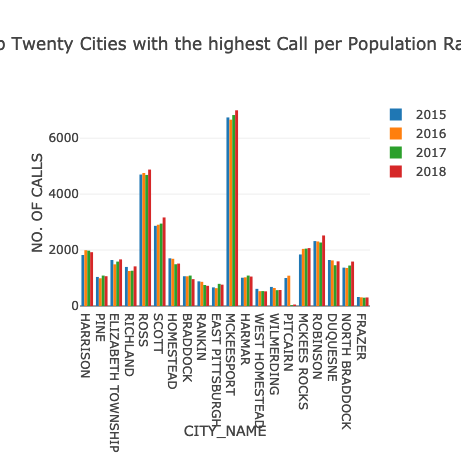

In [93]:
fig = bar_plot(Top_20_df,y='NO. OF CALLS')
fig.update(generate_labels(title,xlabel,ylabel='NO. OF CALLS'))
iplot(fig)

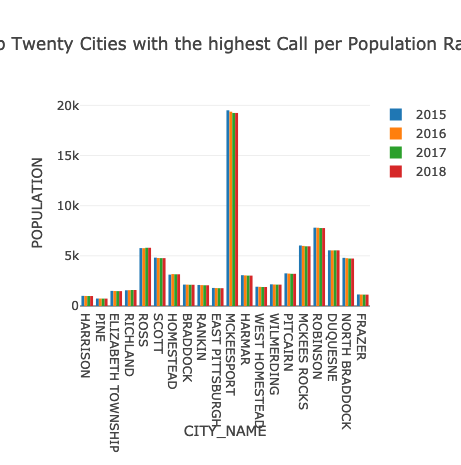

In [94]:
fig = bar_plot(Top_20_df,y='POPULATION')
fig.update(generate_labels(title,xlabel,ylabel='POPULATION'))
iplot(fig)

In [95]:
Top_20_df_3000 = top_plot(call_per_city_2015, 
                          call_per_city_2016, 
                          call_per_city_2017,
                          call_per_city_2018,
                          top=34,pop_cutoff=3000)

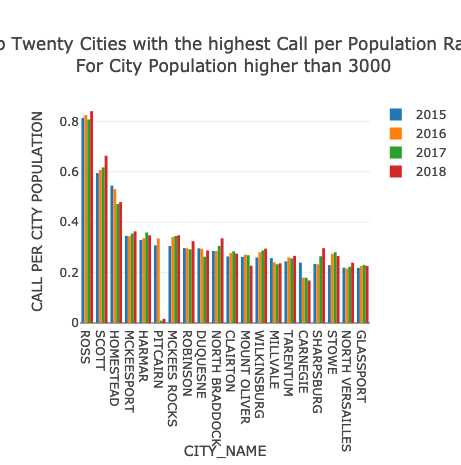

In [100]:
fig = bar_plot(Top_20_df_3000)
title2=("Top Twenty Cities with the highest Call per Population Ratio"
        "<br> For City Population higher than 3000")
fig.update(generate_labels(title2,
                           xlabel,
                           ylabel="CALL PER CITY POPULATION"))
iplot(fig)

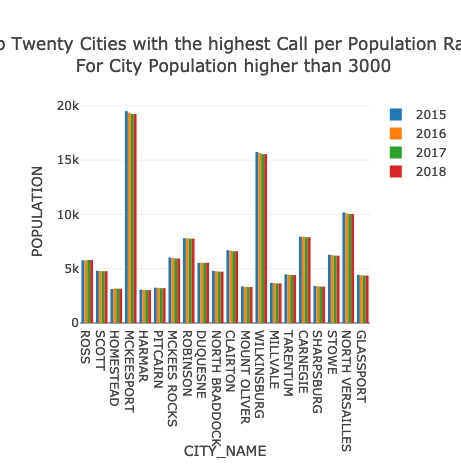

In [101]:
fig = bar_plot(Top_20_df_3000,y='POPULATION')
fig.update(generate_labels(title2,xlabel,ylabel='POPULATION'))
iplot(fig)

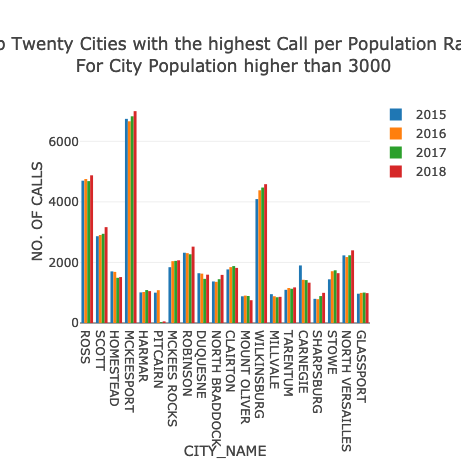

In [103]:
fig = bar_plot(Top_20_df_3000,y='NO. OF CALLS')
fig.update(generate_labels(title2,xlabel,ylabel='NO. OF CALLS'))
iplot(fig)

In [104]:
df_ems_Q = df_ems.groupby(['CALL_QUARTER', 'CALL_YEAR']).size().reset_index(name='COUNT')
df_ems_Q.head()

CALL_QUARTER  CALL_YEAR  COUNT
0           Q1       2015  47103
1           Q1       2016  46434
2           Q1       2017  48690
3           Q1       2018  49261
4           Q2       2015  47254

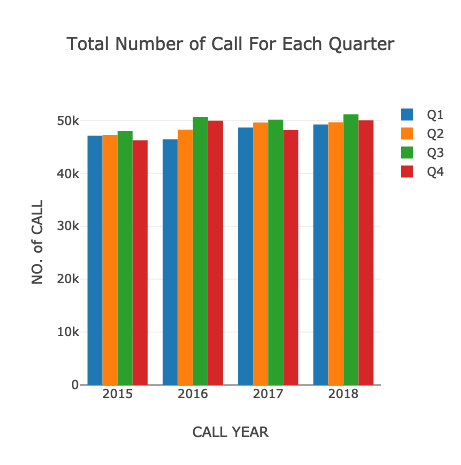

In [105]:
fig = bar_plot(df_ems_Q,y='COUNT',x='CALL_YEAR',hue='CALL_QUARTER')
title3 = "Total Number of Call For Each Quarter"
fig.update(generate_labels(title3,
                           xlabel='CALL YEAR',
                           ylabel='NO. of CALL'))
iplot(fig)


In [186]:
def grid_bar_plot(df, col='CITY_NAME', 
                  colorway=['#023eff', '#ff7c00', 
                            '#1ac938', '#e8000b'],
                  x=['PITTSBURGH','HOMESTEAD', 'PINE']):
    
    nrow = int(round(len(x)/2,0))
    
    xcol = 'CALL_YEAR'
    ycol = 'COUNT'
    hue = 'CALL_QUARTER'
    df_mod = dict()
    
    trace_list=[]
    titles = []
    for name in x:
        df_mod = (df[df[col] == name]
                  .groupby(['CALL_QUARTER', 'CALL_YEAR'])
                  .size().reset_index(name=ycol))
        
        trace_list.append(bar_plot(df_mod,
                          x=xcol,y=ycol,
                          hue='CALL_QUARTER', get_traces=True))
        
        titles.append('EMS Call Per <br> Quarter in {ct}'.format(ct=name))
        
    fig = tools.make_subplots(rows=nrow, cols=2,
                              subplot_titles=tuple(titles))
    
    for row in range(1,nrow+1):
        for col in range(1,3):
            traces = trace_list.pop(0)
            for trace in traces:
                fig.append_trace(trace,row,col)

    fig['layout'].update(margin=go.layout.Margin(
            l=50,
            r=50,
            b=50,
            t=20,
            pad=0
        ))
    fig['layout'].update(height=300*nrow, width=800,showlegend=False,
                         colorway=colorway)
    iplot(fig, filename='customizing-subplot-axes')
    

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



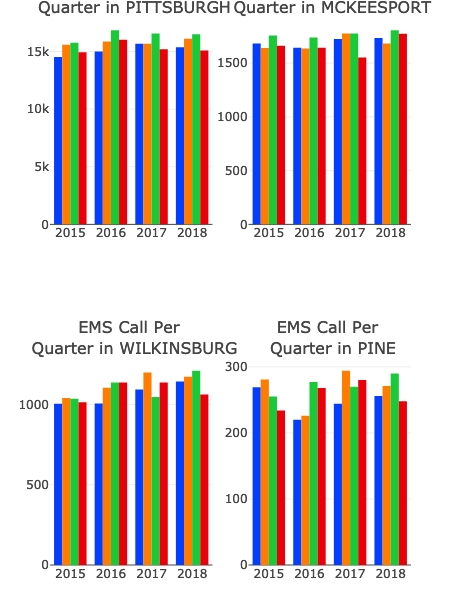

In [187]:
grid_bar_plot(df_ems,x=['PITTSBURGH','MCKEESPORT','WILKINSBURG','PINE'] )

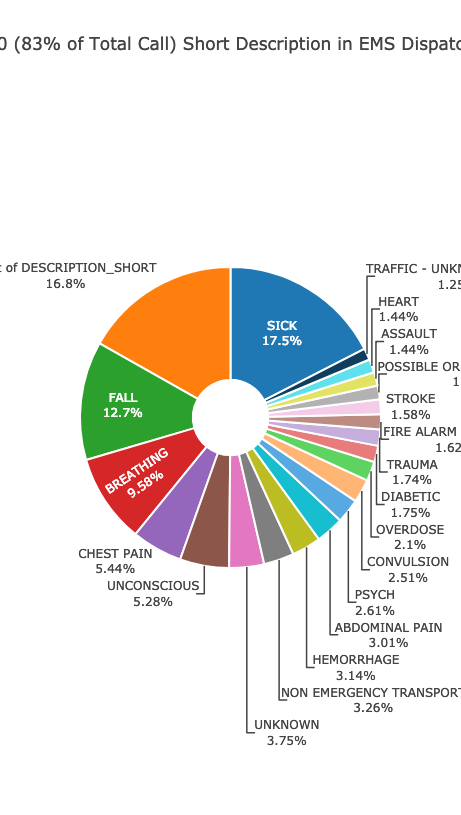

In [99]:
def pie_trace(df, col, top=20):
    description_count = df[col].value_counts()
    values = description_count.values.tolist()
    labels = description_count.index.tolist() 
    if top:
        values = values[:top]+[sum(values[top:])]
        labels = labels[:top] + ['Rest of '+col]
    
    trace = [go.Pie(labels=labels,values=values)]
    return trace
trace = pie_trace(df_ems, 'DESCRIPTION_SHORT')

layout = go.Layout(title=('Top 20 (83% of Total Call) Short '
                          'Description in EMS Dispatch Call'))
fig = go.Figure(data=trace,layout=layout)
fig['layout'].update(height=800, width=1000)
fig.update(layout=dict(showlegend=False))
fig.data[0].update(textinfo='label+percent', hole=0.25,
                   marker=dict(line=dict(color='#FFF', width=2)))
iplot(fig)



This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5 ]  [ (3,2) x6,y6 ]



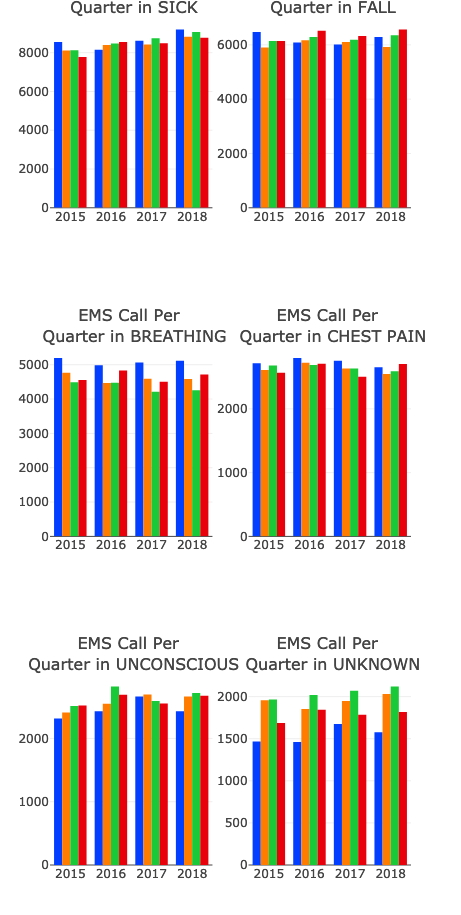

In [224]:
grid_bar_plot(df_ems, col='DESCRIPTION_SHORT', x=['SICK','FALL','BREATHING','CHEST PAIN','UNCONSCIOUS','UNKNOWN'])

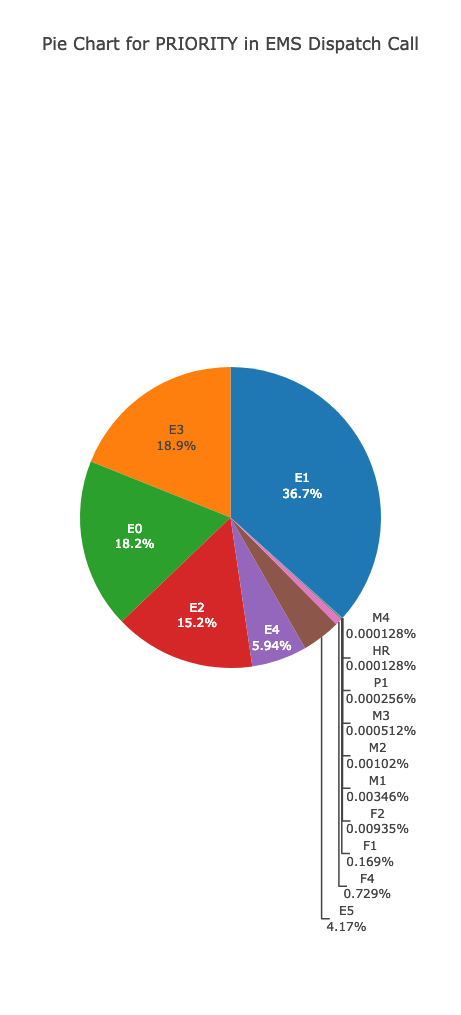

In [96]:
trace = pie_trace(df_ems, 'PRIORITY',top=False)

layout = go.Layout(title=('Pie Chart for PRIORITY '
                          'in EMS Dispatch Call'))
fig = go.Figure(data=trace,layout=layout)
fig['layout'].update(height=1000, width=800)
fig.update(layout=dict(showlegend=False))
fig.data[0].update(textinfo='label+percent')
iplot(fig)

## Fourty Cities Represent 80% of EMS Calls

In [20]:
(df_ems['CITY_NAME'].value_counts()/
 df_ems['CITY_NAME'].value_counts().sum())[:40].sum()

0.808349462083241

In [226]:
# Convert population dictionary to dataframe
# pop_df=pd.DataFrame.from_dict(pop_dict,orient='index')
# pop_df['POP_AVG']=pop_df.mean(axis=1).astype('int')
# pop_df = pop_df.rename_axis("CITY_NAME").reset_index()
pop_df = load_obj('pop_df')
pop_df.head()

CITY_NAME   2015   2016   2017  POP_AVG
0            ALEPPO   1198   1191   1184     1191
1         ASPINWALL   2770   2749   2732     2750
2            AVALON   4651   4616   4586     4617
3      BALDWIN BORO  19802  19741  19610    19717
4  BALDWIN TOWNSHIP  19802  19741  19610    19717

In [227]:
# Build a dataframe with accumulative calls for each city
df_total_call=(df_ems
  .groupby(['CITY_NAME']).size().reset_index(name='TOTAL_CALL')
  .sort_values(by=['TOTAL_CALL'],ascending=False))

In [228]:
# Add average population column to the dataframe
df_total_call = pd.merge(df_total_call, 
                         pop_df[['CITY_NAME','POP_AVG']], 
                         how='left',on='CITY_NAME')
df_total_call.head()

CITY_NAME  TOTAL_CALL  POP_AVG
0     PITTSBURGH      250676   303959
1     MCKEESPORT       27228    19374
2     PENN HILLS       26626    41576
3  MOUNT LEBANON       23044    32565
4           ROSS       19019     5780

In [269]:
def get_description_table(df, df_total_call, description):
    temp=(df[df['DESCRIPTION_SHORT'].isin(description)]
          .groupby(['CITY_NAME','CALL_QUARTER',
                    'DESCRIPTION_SHORT']).size()
          .reset_index(name='COUNT')
          )

    temp = pd.merge(temp,df_total_call, how='left',on='CITY_NAME')
#     temp['Call Ratio'] = round(temp.loc[:,description]/
#                                temp.loc[:,'TOTAL_CALL'],3)

    return temp

In [236]:
top_10_description = labels[:10]
top_10_description

['SICK',
 'FALL',
 'BREATHING',
 'CHEST PAIN',
 'UNCONSCIOUS',
 'UNKNOWN',
 'NON EMERGENCY TRANSPORT',
 'HEMORRHAGE',
 'ABDOMINAL PAIN',
 'PSYCH']

In [268]:
(df_ems[df_ems['DESCRIPTION_SHORT']
 .isin(top_10_description)]
 .groupby(['CITY_NAME','CALL_QUARTER',
           'DESCRIPTION_SHORT']).size().reset_index(name='COUNT'))
         

CITY_NAME CALL_QUARTER        DESCRIPTION_SHORT  COUNT
0         ALEPPO           Q1                BREATHING      1
1         ALEPPO           Q1               CHEST PAIN      4
2         ALEPPO           Q1                     FALL      6
3         ALEPPO           Q1                    PSYCH      1
4         ALEPPO           Q1                     SICK      2
5         ALEPPO           Q1                  UNKNOWN      1
6         ALEPPO           Q2                BREATHING      2
7         ALEPPO           Q2               CHEST PAIN      1
8         ALEPPO           Q2                     FALL      2
9         ALEPPO           Q2               HEMORRHAGE      1
10        ALEPPO           Q2                    PSYCH      1
11        ALEPPO           Q2                     SICK      5
12        ALEPPO           Q2              UNCONSCIOUS      2
13        ALEPPO           Q3                BREATHING      6
14        ALEPPO           Q3               CHEST PAIN      2
15        ALEPPO           Q3                     FALL      3
16        ALEPPO           Q3               HEMORRHAGE      1
17        ALEPPO           Q3                    PSYCH      1
18        ALEPPO           Q3                     SICK      8
19        ALEPPO           Q3              UNCONSCIOUS      1
20        ALEPPO           Q4           ABDOMINAL PAIN      1
21        ALEPPO           Q4                BREATHING      8
22        ALEPPO           Q4               CHEST PAIN      1
23        ALEPPO           Q4                     FALL     21
24        ALEPPO           Q4               HEMORRHAGE      3
25        ALEPPO           Q4  NON EMERGENCY TRANSPORT      5
26        ALEPPO           Q4                    PSYCH      3
27        ALEPPO           Q4                     SICK     13
28        ALEPPO           Q4              UNCONSCIOUS      3
29        ALEPPO           Q4                  UNKNOWN      2
...          ...          ...                      ...    ...
4469  WILMERDING           Q1                  UNKNOWN     18
4470  WILMERDING           Q2           ABDOMINAL PAIN     34
4471  WILMERDING           Q2                BREATHING     70
4472  WILMERDING           Q2               CHEST PAIN     35
4473  WILMERDING           Q2                     FALL     69
4474  WILMERDING           Q2               HEMORRHAGE     25
4475  WILMERDING           Q2                    PSYCH     27
4476  WILMERDING           Q2                     SICK    120
4477  WILMERDING           Q2              UNCONSCIOUS     27
4478  WILMERDING           Q2                  UNKNOWN     29
4479  WILMERDING           Q3           ABDOMINAL PAIN     29
4480  WILMERDING           Q3                BREATHING     64
4481  WILMERDING           Q3               CHEST PAIN     51
4482  WILMERDING           Q3                     FALL     70
4483  WILMERDING           Q3               HEMORRHAGE     25
4484  WILMERDING           Q3  NON EMERGENCY TRANSPORT      3
4485  WILMERDING           Q3                    PSYCH     25
4486  WILMERDING           Q3                     SICK    120
4487  WILMERDING           Q3              UNCONSCIOUS     30
4488  WILMERDING           Q3                  UNKNOWN     35
4489  WILMERDING           Q4           ABDOMINAL PAIN     20
4490  WILMERDING           Q4                BREATHING     94
4491  WILMERDING           Q4               CHEST PAIN     33
4492  WILMERDING           Q4                     FALL     64
4493  WILMERDING           Q4               HEMORRHAGE     25
4494  WILMERDING           Q4  NON EMERGENCY TRANSPORT      1
4495  WILMERDING           Q4                    PSYCH     23
4496  WILMERDING           Q4                     SICK    122
4497  WILMERDING           Q4              UNCONSCIOUS     18
4498  WILMERDING           Q4                  UNKNOWN     15

[4499 rows x 4 columns]

In [270]:
get_description_table(df_ems, df_total_call, ['SICK','FALL'])

CITY_NAME CALL_QUARTER DESCRIPTION_SHORT  COUNT  TOTAL_CALL  POP_AVG
0          ALEPPO           Q1              FALL      6         296     1191
1          ALEPPO           Q1              SICK      2         296     1191
2          ALEPPO           Q2              FALL      2         296     1191
3          ALEPPO           Q2              SICK      5         296     1191
4          ALEPPO           Q3              FALL      3         296     1191
5          ALEPPO           Q3              SICK      8         296     1191
6          ALEPPO           Q4              FALL     21         296     1191
7          ALEPPO           Q4              SICK     13         296     1191
8       ASPINWALL           Q1              FALL     46        1026     2750
9       ASPINWALL           Q1              SICK     34        1026     2750
10      ASPINWALL           Q2              FALL     25        1026     2750
11      ASPINWALL           Q2              SICK     42        1026     2750
12      ASPINWALL           Q3              FALL     44        1026     2750
13      ASPINWALL           Q3              SICK     38        1026     2750
14      ASPINWALL           Q4              FALL     45        1026     2750
15      ASPINWALL           Q4              SICK     34        1026     2750
16         AVALON           Q1              FALL    210        3945     4617
17         AVALON           Q1              SICK    179        3945     4617
18         AVALON           Q2              FALL    186        3945     4617
19         AVALON           Q2              SICK    192        3945     4617
20         AVALON           Q3              FALL    156        3945     4617
21         AVALON           Q3              SICK    174        3945     4617
22         AVALON           Q4              FALL    185        3945     4617
23         AVALON           Q4              SICK    171        3945     4617
24   BALDWIN BORO           Q1              FALL    517       13260    19717
25   BALDWIN BORO           Q1              SICK    821       13260    19717
26   BALDWIN BORO           Q2              FALL    534       13260    19717
27   BALDWIN BORO           Q2              SICK    710       13260    19717
28   BALDWIN BORO           Q3              FALL    540       13260    19717
29   BALDWIN BORO           Q3              SICK    658       13260    19717
..            ...          ...               ...    ...         ...      ...
966     WHITEHALL           Q2              FALL    378        8667    13765
967     WHITEHALL           Q2              SICK    475        8667    13765
968     WHITEHALL           Q3              FALL    390        8667    13765
969     WHITEHALL           Q3              SICK    462        8667    13765
970     WHITEHALL           Q4              FALL    410        8667    13765
971     WHITEHALL           Q4              SICK    420        8667    13765
972       WILKINS           Q1              FALL    176        4141     6247
973       WILKINS           Q1              SICK    172        4141     6247
974       WILKINS           Q2              FALL    141        4141     6247
975       WILKINS           Q2              SICK    170        4141     6247
976       WILKINS           Q3              FALL    167        4141     6247
977       WILKINS           Q3              SICK    144        4141     6247
978       WILKINS           Q4              FALL    158        4141     6247
979       WILKINS           Q4              SICK    146        4141     6247
980   WILKINSBURG           Q1              FALL    373       17535    15646
981   WILKINSBURG           Q1              SICK    870       17535    15646
982   WILKINSBURG           Q2              FALL    379       17535    15646
983   WILKINSBURG           Q2              SICK    845       17535    15646
984   WILKINSBURG           Q3              FALL    375       17535    15646
985   WILKINSBURG           Q3              SICK    865       17535    15646
986 

In [230]:
description_df=get_description_table(df_ems, df_total_call, 'SICK')

In [231]:
t.head()

CITY_NAME CALL_QUARTER   SICK  TOTAL_CALL  POP_AVG  Call Ratio
0  PITTSBURGH           Q3  11876      250676   303959       0.047
1  PITTSBURGH           Q1  11519      250676   303959       0.046
2  PITTSBURGH           Q2  11372      250676   303959       0.045
3  PITTSBURGH           Q4  11219      250676   303959       0.045
4  PENN HILLS           Q2   1183       26626    41576       0.044

In [295]:
t2=(t[t['POP_AVG']>3000]
    .groupby(['CITY_NAME'],as_index=False)
    .agg({'SICK':sum,
          'Call Ratio':sum,
          'TOTAL_CALL':max,
          'POP_AVG':max}))
t2.sort_values(by=['Call Ratio'],inplace=True,ascending=False)
t2.head(10)

CITY_NAME  SICK  Call Ratio  TOTAL_CALL  POP_AVG
25         HARMAR   991       0.237        4177     3050
1    BALDWIN BORO  2944       0.223       13260    19717
5    BRACKENRIDGE   624       0.221        2830     3200
60  SOUTH FAYETTE  1902       0.216        8763    15516
73      WHITEHALL  1877       0.216        8667    13765
27        INDIANA   829       0.215        3850    13454
56          SCOTT  2493       0.211       11884     4792
45        OAKMONT   997       0.210        4731     6443
15       DUQUESNE  1257       0.198        6328     5546
39   MOUNT OLIVER   675       0.197        3431     3338

CITY_NAME  Call Ratio  TOTAL_CALL
111      THORNBURG       0.250         112
103  SOUTH FAYETTE       0.239        8763
59         KENNEDY       0.239        6861
97           SCOTT       0.215       11884
63         LIBERTY       0.208        1121
50         HAMPTON       0.206        6584
16     BRIDGEVILLE       0.204        3185
10         BLAWNOX       0.201        1028
17        CARNEGIE       0.196        6077
66      MCCANDLESS       0.192       15570

In [339]:
cc = pd.merge(a,aa, how='left',on='CITY_NAME')

In [340]:
cc ['Ratio'] = cc.iloc[:,1]/cc.iloc[:,2]

In [341]:
cc.sort_values(by=['Ratio'],inplace=True,ascending=False)

In [342]:
cc.head(10)

CITY_NAME  SICK_CALLS  TOTAL_CALLS     Ratio
36           HARMAR         991         4177  0.237252
7      BALDWIN BORO        2944        13260  0.222021
51     BRACKENRIDGE         624         2830  0.220495
101  BRADFORD WOODS          70          318  0.220126
10    SOUTH FAYETTE        1902         8763  0.217049
11        WHITEHALL        1877         8667  0.216569
40          INDIANA         829         3850  0.215325
33          OAKMONT         997         4731  0.210738
8             SCOTT        2493        11884  0.209778
47           RANKIN         663         3220  0.205901

In [313]:
c = a.join(b, how='left',on='CITY_NAME')

In [317]:
c['CALL_PER_POP'] = c.iloc[:,1]/c.iloc[:,5]
c.sort_values(inplace=True,by=['CALL_PER_POP'],ascending=False)